In [27]:
from openai import OpenAI
import pandas as pd

# Initialize the OpenAI client
client = OpenAI()

df = pd.read_csv('nouns.csv')

# Define a translation function using the OpenAI API
def translate(noun):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are an expert in Moroccan Darija dialect and in translating Darija to English."},
            {"role": "user", "content": "Translate the provided Moroccan Darija dialect noun into English using word-by-word translation."},
            {"role": "assistant", "content": "OK, I understand. I am ready for the noun translation."},
            {"role": "user", "content": "ديما"},
            {"role": "assistant", "content": "Always"},
            {"role": "user", "content":  f'{noun}' }

        ],
        temperature=0.1  # Deterministic responses
    )
    return completion.choices[0].message.content

# Apply the translation function to the 'darija_ar' column
df['noun'] = df['darija_ar'].apply(translate)

# Display or save the resulting DataFrame
print(df)


               n1          n2         n3  darija_ar          eng  \
0           9ahwa        9hwa      9ehwa       قهوة       coffee   
1           korsi        krsi        NaN       كرسي        chair   
2           tabla        tbla        NaN       طبلة        table   
3             kas         NaN        NaN        كاس        glass   
4              ma         lma        NaN        ماء        water   
...           ...         ...        ...        ...          ...   
1323  lizikottour  lizikotour  lizikotor  ليزيكوتور   headphones   
1324     matiryal    mataryan   materiel   ماتيريال     hardware   
1325      portabl    portable        NaN    پورتابل   cell phone   
1326       maw3id      mou3id    maou3id       موعد  appointment   
1327       reveil       revey     rrevey      ريفاي        alarm   

                noun  
0             Coffee  
1              Chair  
2               Drum  
3                Cup  
4              Water  
...              ...  
1323     Lizikoutour  

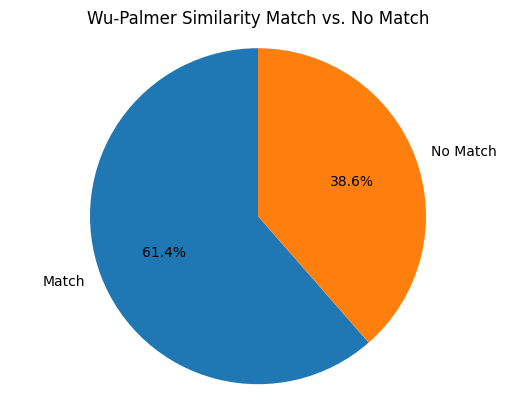

In [56]:
import matplotlib.pyplot as plt
from nltk.corpus import wordnet as wn

eng = df['eng']
transl = df['noun']

#transl = [verb.replace(" ", "_") for verb in transl]
#eng = [verb.replace(" ", "_") for verb in eng]

def get_synset(word):
    synsets = wn.synsets(word, pos=wn.NOUN)
    return synsets[0] if synsets else None
# Calculate Wu-Palmer similarity

def calculate_wup_similarity(word1, word2):
    """Calculate the maximum path similarity between two words."""

    synset1 = get_synset(word1)
    synset2 = get_synset(word2)
    
    if synset1 and synset2:
        return synset1.wup_similarity(synset2)
    return 0
# Calculate and print the path similarity for each pair of verbs with similar index

# Matching threshold
threshold = 0.5
matches = 0
non_matches = 0


# Compare ith row in each column
for i in range(len(df)):
    similarity = calculate_wup_similarity(df.loc[i, 'eng'], df.loc[i, 'noun'])
    if similarity and similarity >= threshold:
        matches += 1
    else:
        non_matches += 1

# Data for pie chart
data = [matches, non_matches]
labels = ['Match', 'No Match']

# Create pie chart
fig, ax = plt.subplots()
ax.pie(data, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Wu-Palmer Similarity Match vs. No Match')
plt.show()